In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps

import xtrack as xt
import xpart as xp
import xobjects as xo
import xcoll as xc

# Line without sagitta

## Experimental values from Hannes

In [139]:
line = xt.Line.from_json('../../injection_lines/sps_q20_inj.json')
env = line.env

Loading line from dict:   0%|          | 0/4037 [00:00<?, ?it/s]

Done loading line from dict.           


In [130]:
tw = line.twiss()
print(f"Qx={tw.qx}, Qy={tw.qy}")
print(f"dQx={tw.dqx}, dQy={tw.dqy}")

Qx=20.130095528964272, Qy=20.18009638231108
dQx=11.224802104017328, dQy=10.295686180228358


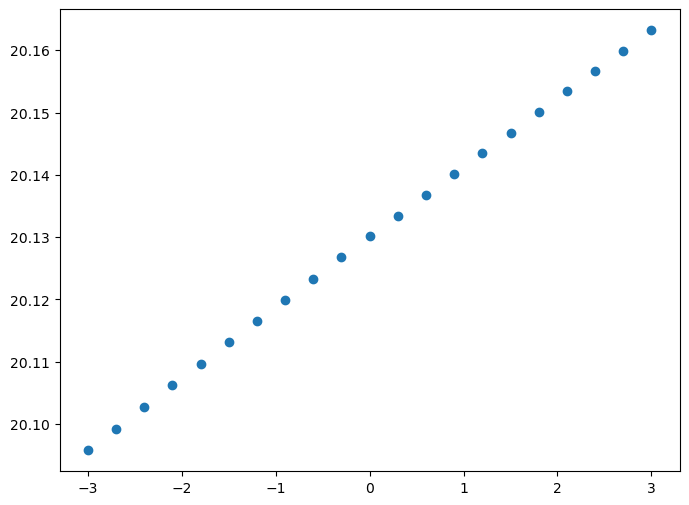

In [131]:
deltas = np.linspace(-3e-3, 3e-3, 21)
twisses_bef = [line.twiss4d(delta0=d) for d in deltas]

fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.scatter(deltas*1e3, [twiss.qx for twiss in twisses_bef], label='dQx', color='C0')

In [140]:
tte = env.elements.get_table()
mask_rbends = tte.element_type == 'RBend'
mask_quads = tte.element_type == 'Quadrupole'
mask_sextupoles = tte.element_type == 'Sextupole'

mba = tte.rows[mask_rbends].rows['mba.*'].name
mbb = tte.rows[mask_rbends].rows['mbb.*'].name
qf = tte.rows[mask_quads].rows['qf.*'].name
qd = tte.rows[mask_quads].rows['qd.*'].name
lsf = tte.rows[mask_sextupoles].rows['lsf.*'].name
lsd = tte.rows[mask_sextupoles].rows['lsd.*'].name

In [141]:
# Set the sextupole strengths according to Hannes' measurements with knobs (klsfa0, klsfb0, klsda0, klsdb0)
# Problem with the knob (according to Frederik), it is said to be kl but it is actually k
env.vars['qph_setvalue'] = 0.0
env.vars['qpv_setvalue'] = 0.0

env.vars['klsfa0'] = 0.4883e-1 * line['lsf.61205'].length
env.vars['klsfb0'] = -0.2892e-1 * line['lsf.62605'].length
env.vars['klsda0'] = -0.2917e-1 * line['lsd.62505'].length
env.vars['klsdb0'] = 0.4517e-1 * line['lsd.63505'].length

In [123]:
tw = line.twiss()
print(f"Qx={tw.qx}, Qy={tw.qy}")
print(f"dQx={tw.dqx}, dQy={tw.dqy}")

Qx=20.130095526477486, Qy=20.1800963832845
dQx=9.37232933168275, dQy=-28.789011447472035


In [142]:
# Set the strengths according to Hannes' measurements
for nn in mba:
    env[nn].knl = np.array([0., 0., 2.13e-3, 0., -5.94, 0.])

for nn in mbb:
    env[nn].knl = np.array([0., 0., -3.23e-3, 0., -3.54, 0.])

for nn in qf:
    env[nn].knl = np.array([0., 0., 0., 0.84e-1, 0., -1.04e3])

for nn in qd:
    env[nn].knl = np.array([0., 0., 0., -1.84e-1, 0., 0.89e3])

In [135]:
tw = line.twiss()
print(f"Qx={tw.qx}, Qy={tw.qy}")
print(f'dqx={tw.dqx}, dqy={tw.dqy}')

Qx=20.129324443119934, Qy=20.180788683622627
dqx=2.475027432851107, dqy=-7.468575396920585


In [143]:
opt = line.match(
    method='4d', # <- passed to twiss
    vary=[
        xt.VaryList(['kqf0', 'kqd0'], step=1e-8, tag='quad')
    ],
    targets = [
        xt.TargetSet(qx=20.13, qy=20.18, tol=1e-6, tag='tune')
    ])

                                             
Optimize - start penalty: 0.01036                           
Matching: model call n. 5 penalty = 1.1878e-07              
Optimize - end penalty:  1.18785e-07                            


In [144]:
tw = line.twiss()
print(f"Qx={tw.qx}, Qy={tw.qy}")
print(f'dqx={tw.dqx}, dqy={tw.dqy}')

Qx=20.130001178704745, Qy=20.180004446128354
dqx=-7.950410085726389, dqy=-17.633723620136266


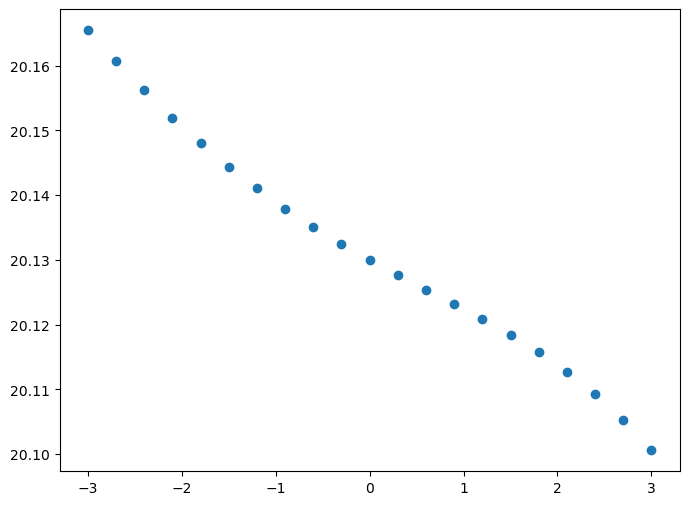

In [145]:
deltas = np.linspace(-3e-3, 3e-3, 21)
twisses = [line.twiss4d(delta0=d) for d in deltas]

fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.scatter(deltas*1e3, [twiss.qx for twiss in twisses], label='dQx', color='C0')

In [8]:
line.to_json('error_lines/sps_q20_inj_exp_errors.json')

## General fitted model

In [9]:
line = xt.Line.from_json('../../injection_lines/sps_q20_inj.json')
env = line.env

Loading line from dict:   0%|          | 0/4037 [00:00<?, ?it/s]

Done loading line from dict.           


In [10]:
tte = env.elements.get_table()
mask_rbends = tte.element_type == 'RBend'
mask_quads = tte.element_type == 'Quadrupole'
mask_sextupoles = tte.element_type == 'Sextupole'

mba = tte.rows[mask_rbends].rows['mba.*'].name
mbb = tte.rows[mask_rbends].rows['mbb.*'].name
qf = tte.rows[mask_quads].rows['qf.*'].name
qd = tte.rows[mask_quads].rows['qd.*'].name
lsf = tte.rows[mask_sextupoles].rows['lsf.*'].name
lsd = tte.rows[mask_sextupoles].rows['lsd.*'].name

In [11]:
env.vars['qph_setvalue'] = 0.4
env.vars['qpv_setvalue'] = 0.4

# Set the strengths according to Hannes' measurements
for nn in mba:
    env[nn].knl = np.array([0., 0., 2.12e-3, 0., -5.74, 0.])

for nn in mbb:
    env[nn].knl = np.array([0., 0., -3.19e-3, 0., -5.10, 0.])

for nn in qf:
    env[nn].knl = np.array([0., 0., 0., 0.75e-1, 0., -0.87e3])

for nn in qd:
    env[nn].knl = np.array([0., 0., 0., -2.03e-1, 0., 2.04e3])

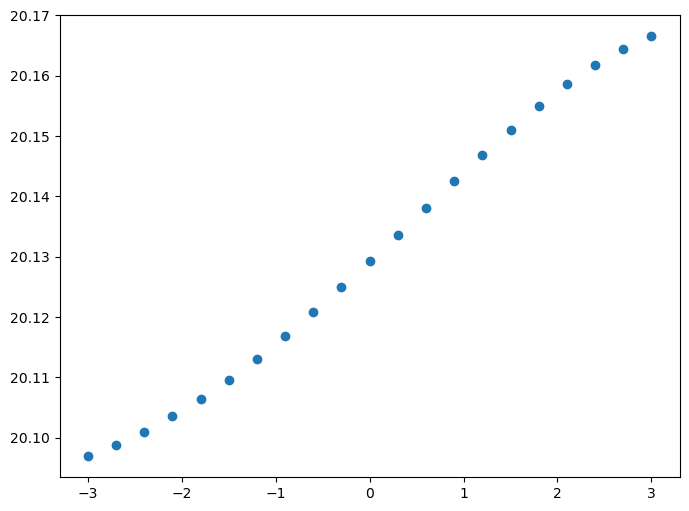

In [12]:
deltas = np.linspace(-3e-3, 3e-3, 21)
twisses = [line.twiss4d(delta0=d) for d in deltas]

fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.scatter(deltas*1e3, [twiss.qx for twiss in twisses], label='dQx', color='C0')

In [13]:
line.to_json('error_lines/sps_q20_inj_fitted_errors.json')

# Line with sagitta

In [76]:
line = xt.Line.from_json('../../injection_lines/sps_with_aperture_inj_q20_beam_sagitta4.json')
env = line.env

Loading line from dict:   0%|          | 0/36381 [00:00<?, ?it/s]

Done loading line from dict.           


In [77]:
tw = line.twiss()
print(f"Matched tunes: Qx={tw.qx}, Qy={tw.qy}")

Matched tunes: Qx=20.11931883942133, Qy=20.169372565287016


In [24]:
env.vars['qph_setvalue'] = 0.4
env.vars['qpv_setvalue'] = 0.4

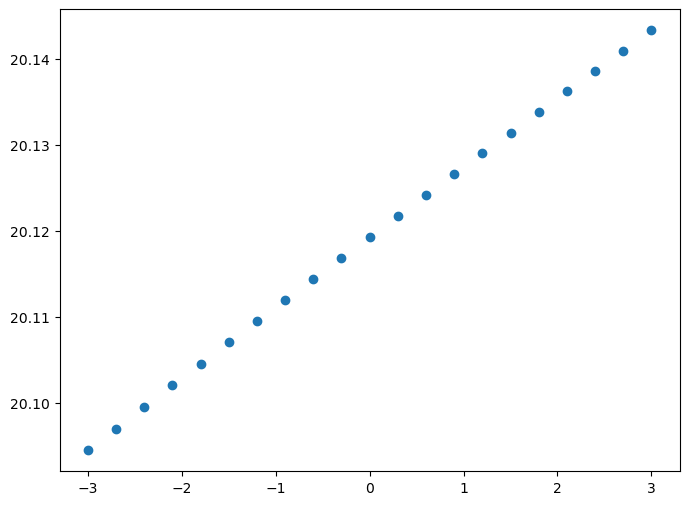

In [25]:
deltas = np.linspace(-3e-3, 3e-3, 21)
twisses_bef = [line.twiss4d(delta0=d) for d in deltas]

fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.scatter(deltas*1e3, [twiss.qx for twiss in twisses_bef], label='dQx', color='C0')

In [26]:
tte = env.elements.get_table()
mask_rbends = tte.element_type == 'RBend'
mask_quads = tte.element_type == 'Quadrupole'
mask_sextupoles = tte.element_type == 'Sextupole'

mba = tte.rows[mask_rbends].rows['mba.*'].name
mbb = tte.rows[mask_rbends].rows['mbb.*'].name
qf = tte.rows[mask_quads].rows['qf.*'].name
qd = tte.rows[mask_quads].rows['qd.*'].name
lsf = tte.rows[mask_sextupoles].rows['lsf.*'].name
lsd = tte.rows[mask_sextupoles].rows['lsd.*'].name

In [28]:
env.vars['qph_setvalue'] = 0.4
env.vars['qpv_setvalue'] = 0.4

# Set the strengths according to Hannes' measurements
for nn in mba:
    env[nn].knl = np.array([0., 0., 2.12e-3, 0., -5.74, 0.])

for nn in mbb:
    env[nn].knl = np.array([0., 0., -3.19e-3, 0., -5.10, 0.])

for nn in qf:
    env[nn].knl = np.array([0., 0., 0., 0.75e-1, 0., -0.87e3])

for nn in qd:
    env[nn].knl = np.array([0., 0., 0., -2.03e-1, 0., 2.04e3])

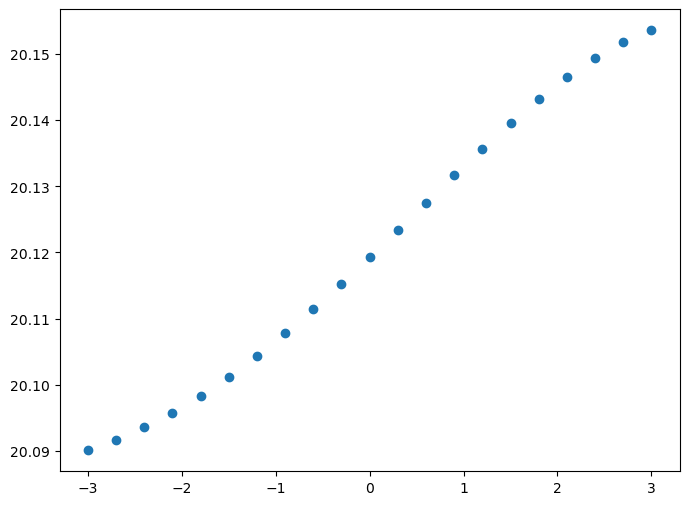

In [29]:
deltas = np.linspace(-3e-3, 3e-3, 21)
twisses = [line.twiss4d(delta0=d) for d in deltas]

fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.scatter(deltas*1e3, [twiss.qx for twiss in twisses], label='dQx', color='C0')

In [30]:
line.to_json('error_lines/sps_with_aperture_inj_q20_beam_sagitta_fitted_errors.json')

# Line preparation for simulations (with sagitta)
We want to match tune and chromaticity with special knob added to the setval

In [282]:
def remove_offmom_bpms_apers(line, exn=3.5e-6, nrj=21, pmass=0.938, bucket_height=3e-3, n_buckets=2):
    "Remove apertures of off-momentum BPMs which give flanges as bottlenecks"
    tt = line.get_table()
    mask_disp = 5*np.sqrt(tw.betx*exn*pmass/nrj)+n_buckets*bucket_height*tw.dx > 0.025
    mask_bpm = ['bp' in name for name in tt.name]
    mask_aper = np.array(['aper' in name for name in tt.name])
    offmom_bpms = tt.name[mask_disp & mask_bpm & ~mask_aper]
    aper_to_remove = [f'{name}{suffix}' for name in offmom_bpms for suffix in ('.a_aper', '.b_aper')]
    line.remove(aper_to_remove)

## Error lines

Chroma 0.5, 0.7, 1.0

In [301]:
line = xt.Line.from_json('../../injection_lines/sps_with_aperture_inj_q20_beam_sagitta4.json')
env = line.env
tw = line.twiss()
print(f"Qx={tw.qx}, Qy={tw.qy}")
print(f"dQx={tw.dqx}, dQy={tw.dqy}")

Loading line from dict:   0%|          | 0/36381 [00:00<?, ?it/s]

Done loading line from dict.           
Qx=20.11931883942133, Qy=20.169372565287016
dQx=0.058013706905057916, dQy=0.011325978093168487


In [302]:
cavity_elements, cavity_names = line.get_elements_of_type(xt.Cavity)

for name in cavity_names:
    line[name].frequency = 200e6
    line[name].lag = 180
line['acl.31735'].voltage = 0 #setting 800 cav to 0V
line['actcse.31632'].voltage = 3.0e6

In [303]:
remove_offmom_bpms_apers(line, exn=3.5e-6, nrj=21, pmass=0.938, bucket_height=3e-3, n_buckets=2)

In [304]:
# optimisation targets
qx = 20.13
qy = 20.18
dqx_rel = 1.0
dqy_rel = 1.0

In [243]:
#Adapting sextupole knobs for chromaticity

# env['klsfa'] = 'klsfa + dqx_klsfa + dqy_klsfa'
# env['klsfb'] = 'klsfb + dqx_klsfb + dqy_klsfb'
# env['klsda'] = 'klsda + dqx_klsda + dqy_klsda'
# env['klsdb'] = 'klsdb + dqx_klsdb + dqy_klsdb'

In [305]:
tte = env.elements.get_table()
mask_rbends = tte.element_type == 'RBend'
mask_quads = tte.element_type == 'Quadrupole'
mask_sextupoles = tte.element_type == 'Sextupole'

mba = tte.rows[mask_rbends].rows['mba.*'].name
mbb = tte.rows[mask_rbends].rows['mbb.*'].name
qf = tte.rows[mask_quads].rows['qf.*'].name
qd = tte.rows[mask_quads].rows['qd.*'].name
lsf = tte.rows[mask_sextupoles].rows['lsf.*'].name
lsd = tte.rows[mask_sextupoles].rows['lsd.*'].name

In [306]:
env.vars['qph_setvalue'] = 0.0
env.vars['qpv_setvalue'] = 0.0

# Set the strengths according to Hannes' measurements
for nn in mba:
    env[nn].knl = np.array([0., 0., 2.12e-3, 0., -5.74, 0.])

for nn in mbb:
    env[nn].knl = np.array([0., 0., -3.19e-3, 0., -5.10, 0.])

for nn in qf:
    env[nn].knl = np.array([0., 0., 0., 0.75e-1, 0., -0.87e3])

for nn in qd:
    env[nn].knl = np.array([0., 0., 0., -2.03e-1, 0., 2.04e3])

In [307]:
env.vars['qph_setvalue'] = dqx_rel
env.vars['qpv_setvalue'] = dqy_rel
opt = line.match(
    method='6d', # <- passed to twiss
    vary=[
        xt.VaryList(['kqf0', 'kqd0'], step=1e-8, tag='quad'),
        xt.VaryList(['qph_setvalue', 'qpv_setvalue'], step=1e-4, tag='sext'),
    ],
    targets = [
        xt.TargetSet(qx=qx, qy=qy, tol=1e-6, tag='tune'),
        xt.TargetSet(dqx=dqx_rel*qx, dqy=dqy_rel*qy, tol=1e-2, tag='chrom'),
    ])

                                             
Optimize - start penalty: 13.1                              
Matching: model call n. 13 penalty = 7.3479e-07              
Optimize - end penalty:  7.34789e-07                            


In [235]:
opt.target_status()

Target status:               nalty = 4.0444e-06              
id state tag   tol_met       residue   current_val    target_val description                          
0  ON    tune     True  -2.28546e-11         20.13         20.13 'qx', val=20.13, tol=1e-06, weight=10
1  ON    tune     True  -2.07834e-12         20.18         20.18 'qy', val=20.18, tol=1e-06, weight=10
2  ON    chrom    True  -4.04428e-06        10.065        10.065 'dqx', val=10.065, tol=0.01, weight=1
3  ON    chrom    True   -3.1017e-08         10.09         10.09 'dqy', val=10.09, tol=0.01, weight=1 


In [236]:
opt.vary_status()

Vary status:                 
id state tag  met name         lower_limit   current_val upper_limit val_at_iter_0          step        weight
0  ON    quad OK  kqf0         None            0.0115847 None            0.0115793         1e-08             1
1  ON    quad OK  kqd0         None           -0.0115864 None            -0.011581         1e-08             1
2  ON    sext OK  qph_setvalue None             0.230518 None                  0.5        0.0001             1
3  ON    sext OK  qpv_setvalue None           -0.0824676 None                  0.5        0.0001             1


In [ ]:
# opt.reload(0)

In [ ]:
# opt.solve()

                                             
Optimize - start penalty: 13.08                              
Matching: model call n. 30 penalty = 2.7908e-05              
Optimize - end penalty:  2.79076e-05                            


In [308]:
tw = line.twiss()
print(f"Matched tunes: Qx={tw.qx}, Qy={tw.qy}")
print(f"Matched chromaticities: dQx={tw.dqx}, dQy={tw.dqy}")

Matched tunes: Qx=20.130000000123317, Qy=20.180000000017948
Matched chromaticities: dQx=20.13000073219473, dQy=20.179999938321203


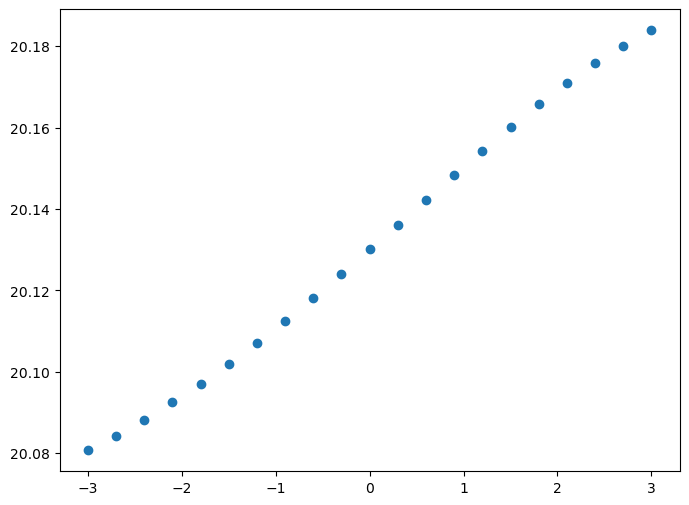

In [257]:
deltas = np.linspace(-3e-3, 3e-3, 21)
twisses = [line.twiss4d(delta0=d) for d in deltas]

fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.scatter(deltas*1e3, [twiss.qx for twiss in twisses], label='dQx', color='C0')

In [309]:
line.to_json(f'lines_rf_sweep_sim/sps_errors_chroma_{dqx_rel}.json')

## Line with no errors
Tune matching and chromas 0.5, 0.7, 1.0

In [324]:
line = xt.Line.from_json('../../injection_lines/sps_with_aperture_inj_q20_beam_sagitta4.json')
env = line.env
tw = line.twiss()
print(f"Qx={tw.qx}, Qy={tw.qy}")
print(f"dQx={tw.dqx}, dQy={tw.dqy}")

Loading line from dict:   0%|          | 0/36381 [00:00<?, ?it/s]

Done loading line from dict.           
Qx=20.11931883942133, Qy=20.169372565287016
dQx=0.058013706905057916, dQy=0.011325978093168487


In [325]:
cavity_elements, cavity_names = line.get_elements_of_type(xt.Cavity)

for name in cavity_names:
    line[name].frequency = 200e6
    line[name].lag = 180
line['acl.31735'].voltage = 0 #setting 800 cav to 0V
line['actcse.31632'].voltage = 3.0e6

In [326]:
remove_offmom_bpms_apers(line, exn=3.5e-6, nrj=21, pmass=0.938, bucket_height=3e-3, n_buckets=2)

In [327]:
# optimisation targets
qx = 20.13
qy = 20.18
dqx_rel = 1.0
dqy_rel = 1.0

In [328]:
env.vars['qph_setvalue'] = dqx_rel
env.vars['qpv_setvalue'] = dqy_rel
opt = line.match(
    method='6d', # <- passed to twiss
    vary=[
        xt.VaryList(['kqf0', 'kqd0'], step=1e-8, tag='quad'),
        xt.VaryList(['qph_setvalue', 'qpv_setvalue'], step=1e-4, tag='sext'),
    ],
    targets = [
        xt.TargetSet(qx=qx, qy=qy, tol=1e-6, tag='tune'),
        xt.TargetSet(dqx=dqx_rel*qx, dqy=dqy_rel*qy, tol=1e-2, tag='chrom'),
    ])

                                             
Optimize - start penalty: 0.1907                            
Matching: model call n. 7 penalty = 3.4751e-04              
Optimize - end penalty:  0.000347508                            


In [329]:
tw = line.twiss()
print(f"Matched tunes: Qx={tw.qx}, Qy={tw.qy}")
print(f"Matched chromaticities: dQx={tw.dqx}, dQy={tw.dqy}")

Matched tunes: Qx=20.130000612735465, Qy=20.180000946684217
Matched chromaticities: dQx=20.12978432901491, dQy=20.180272250698295


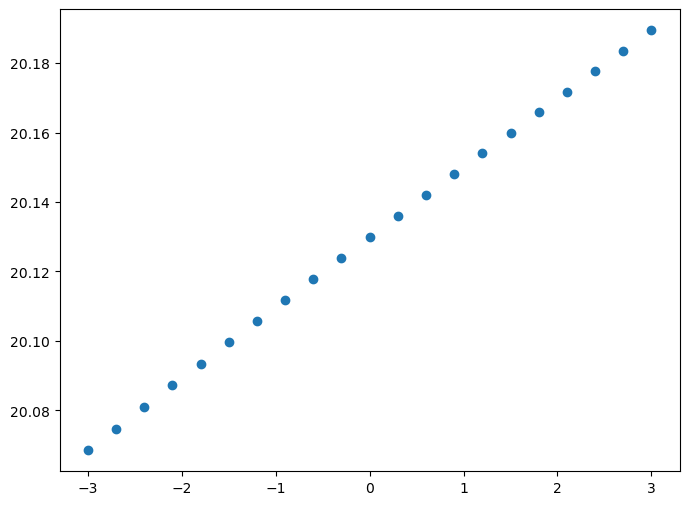

In [279]:
deltas = np.linspace(-3e-3, 3e-3, 21)
twisses = [line.twiss4d(delta0=d) for d in deltas]

fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.scatter(deltas*1e3, [twiss.qx for twiss in twisses], label='dQx', color='C0')

In [330]:
line.to_json(f'lines_rf_sweep_sim/sps_chroma_{dqx_rel}.json')